# DBSCAN cluster analysis - iterative

Here we look at clusters identified by re-running dbscan on the primary cluster of the initial runs for 0.6 and 0.7 e, min samples 10

In [3]:
import cuml
import cudf
import os
import time

In [4]:
import torch
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def plot_density(df, max_rows=7):
    cluster_counts = df['cluster'].value_counts(sort=True)
    print(f'clusters: {len(cluster_counts)}\n')
    print('top 10:')
    print(cluster_counts[0:9])
    
    top_clusters = cluster_counts.index.to_list()
    num_clusters = len(top_clusters)
    num_columns = 4
    num_rows = int(np.ceil(num_clusters/num_columns))
    fig, axis = plt.subplots(min(num_rows, max_rows), num_columns, figsize=(25,35))

    for i, axs in zip(top_clusters[0:num_clusters], axis.flat):
        bins = np.arange(13) - 0.5
        cluster = df[df['cluster'] == i]
        im = axs.hist2d(cluster['head'],cluster['layer'], bins=bins)
        plt.title(f"Cluster {i}")
        axs.set(xlabel='head', ylabel='layer', xlim=[-1,12], ylim=[12,-1], title=f'Cluster{i}')

re-clustering of cluster 0 from DBSCAN with e = 0.6 m = 10 on representations/partitions/half

In [10]:
output_dir='/rapids/notebooks/host/representations/output/iterative/'

clusters: 55

top 10:
-1     67121
 0     15348
 9       426
 10       79
 4        42
 24       28
 14       25
 27       23
 7        22
Name: cluster, dtype: int64


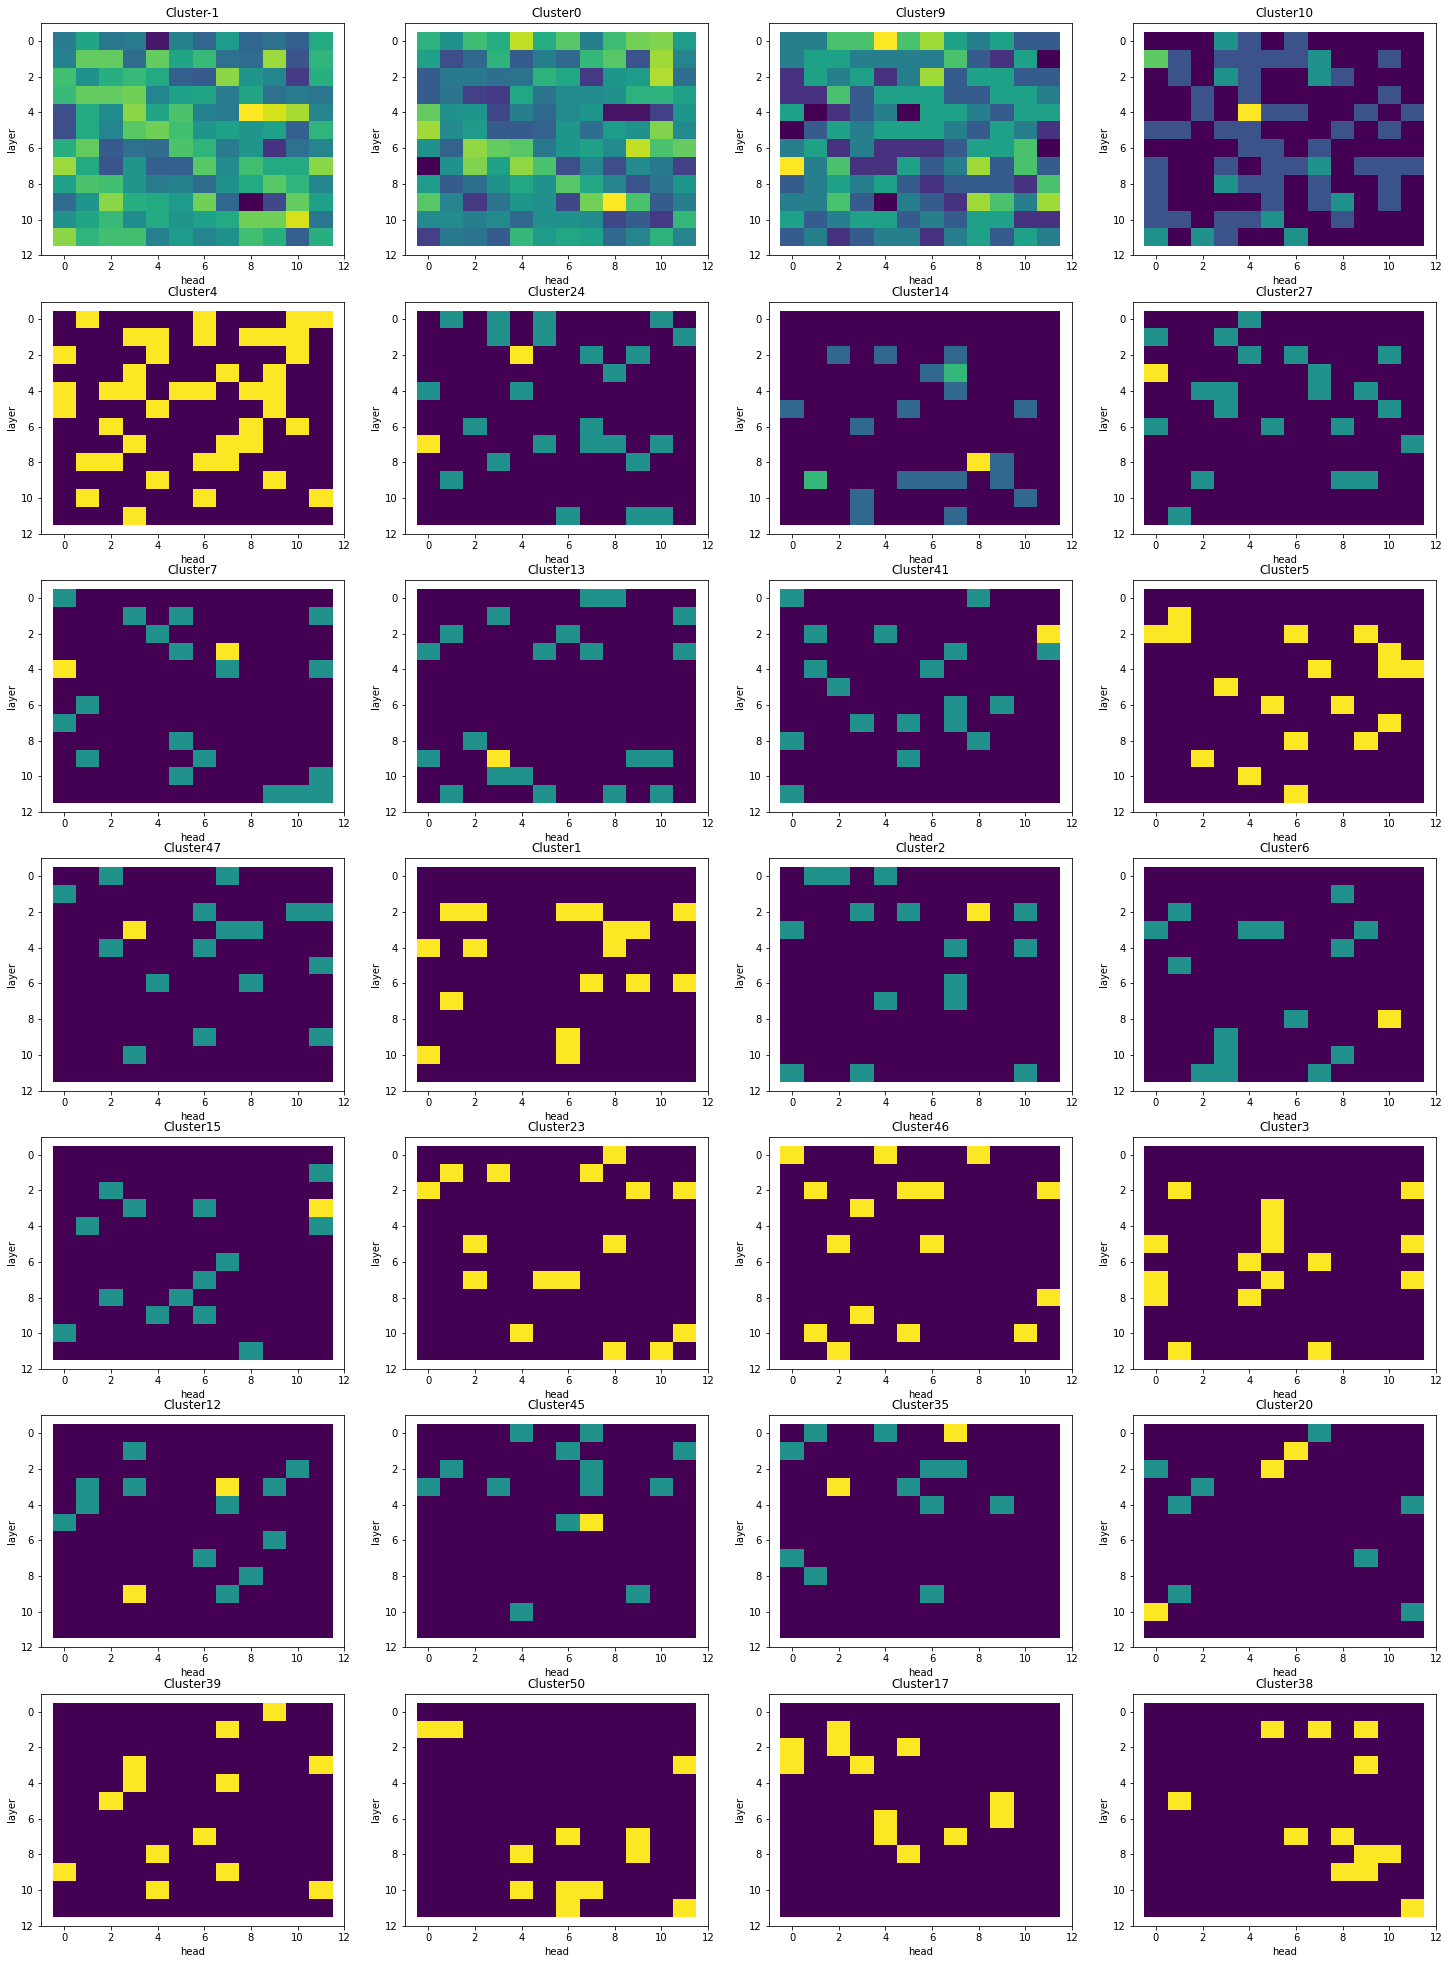

In [11]:
df = torch.load(os.path.join(output_dir,'dask_dbscan_0.5_10_label_df.bin'))
plot_density(df) #displaying only top 28

re-clustering of cluster 0 from DBSCAN with e = 0.7 m = 10 on representations/partitions/half

In [12]:
output_dir='/rapids/notebooks/host/representations/output/iterative_0.7_10/'

clusters: 645

top 10:
-1      255453
 0        1470
 2          51
 47         23
 180        15
 13         15
 9          15
 48         14
 23         14
Name: cluster, dtype: int64


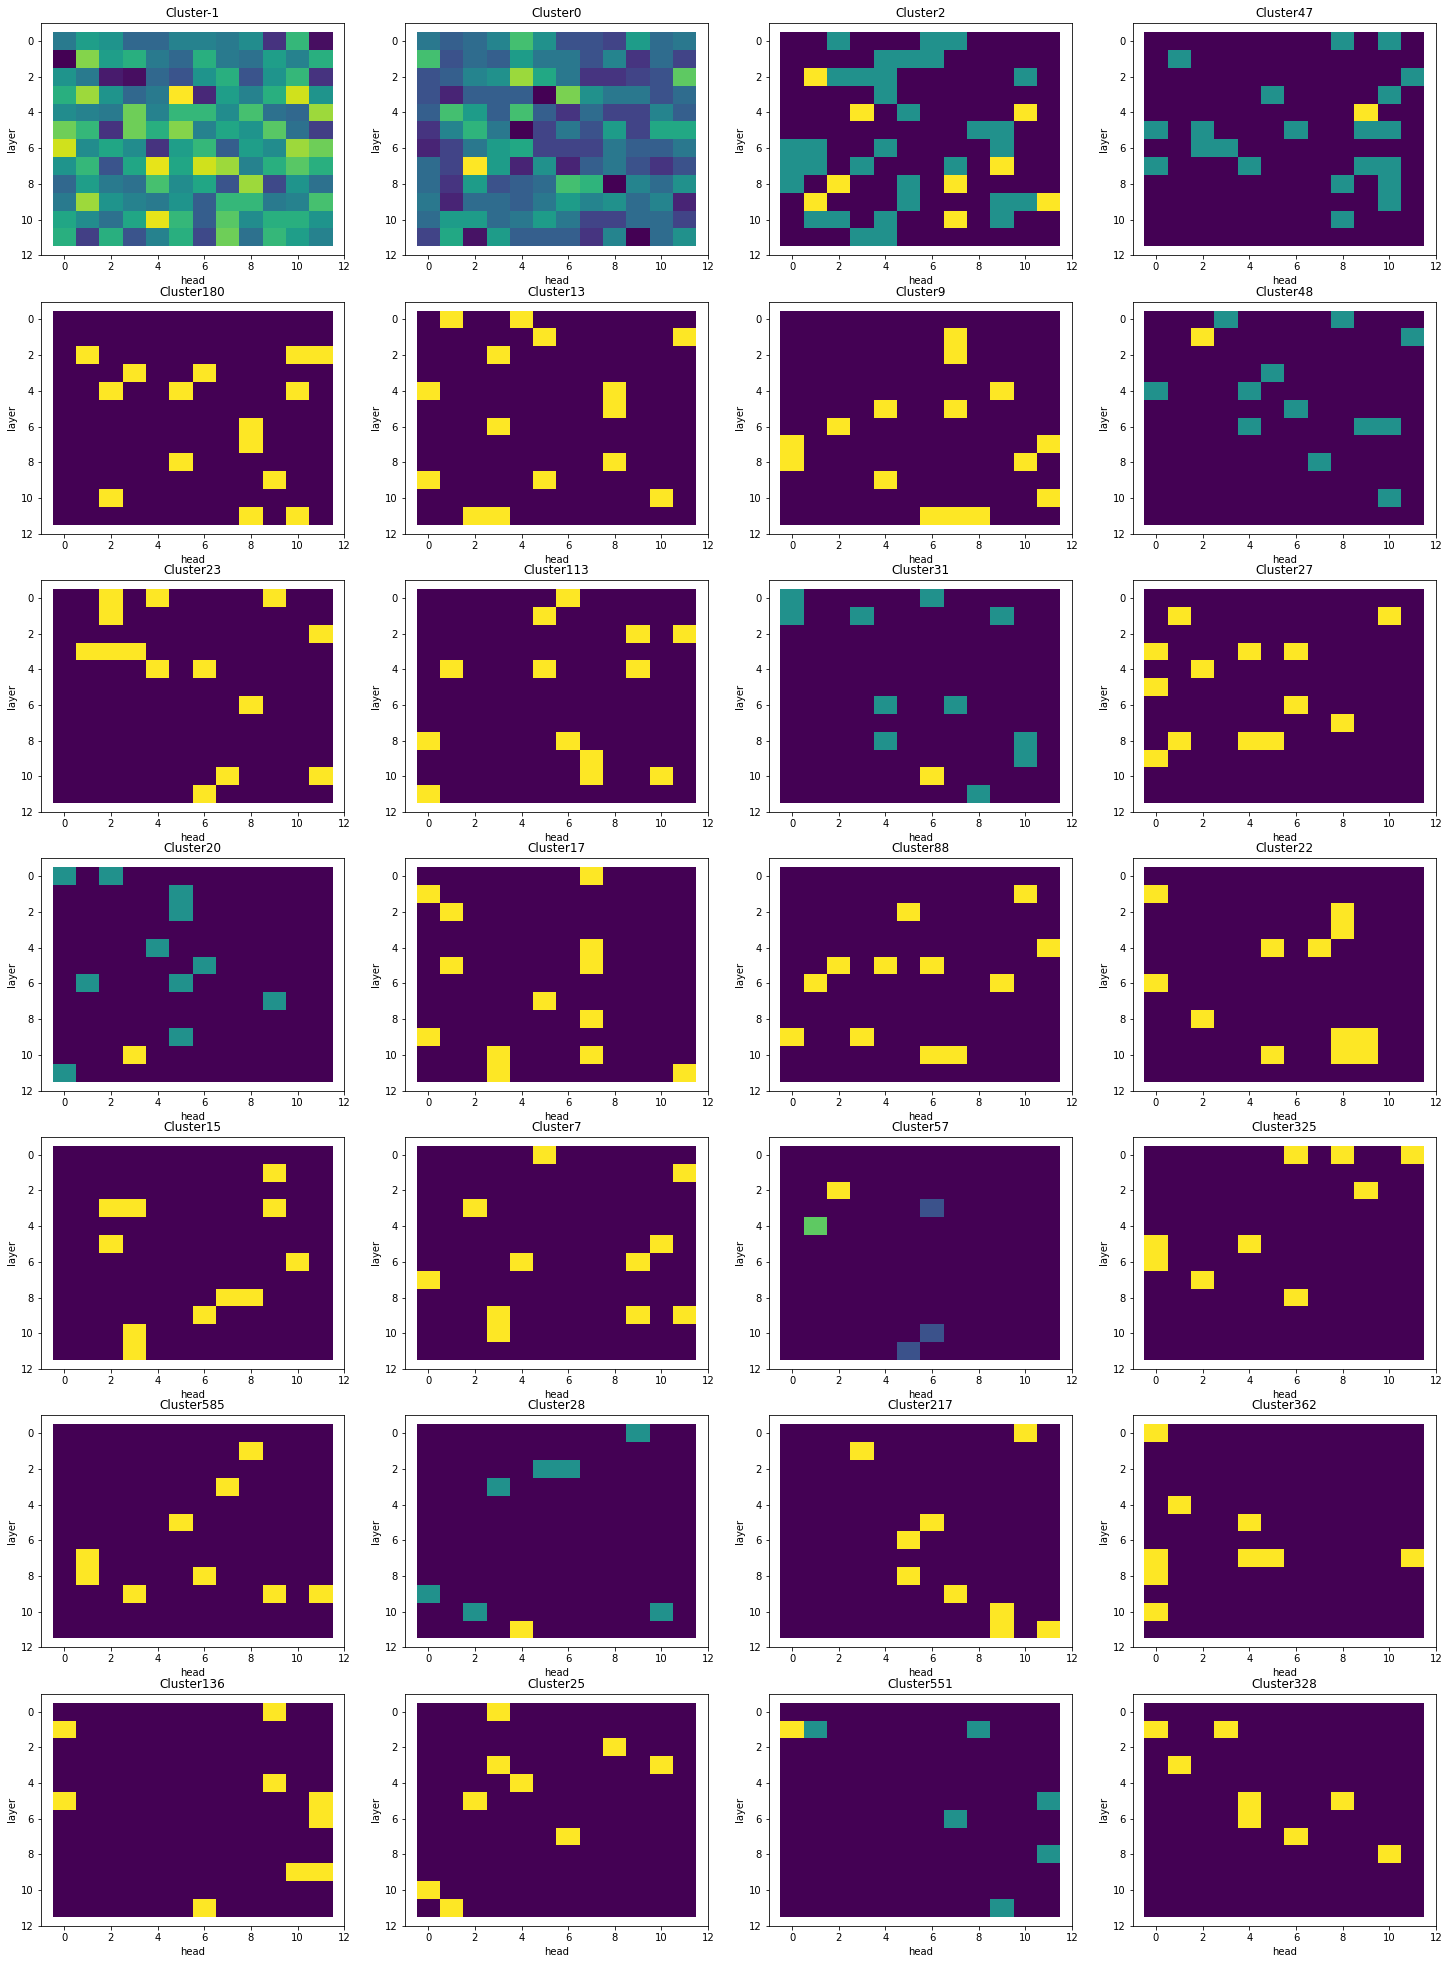

In [13]:
df = torch.load(os.path.join(output_dir,'dask_dbscan_0.35_5_label_df.bin'))
plot_density(df) #displaying only top 28